In [ ]:
#Plotting Multiple Data Series
#Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [54]:
 #1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.
 
%matplotlib inline
data = pd.read_csv('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Module 2/Lab2/liquor_store_sales.csv')
data.head()


,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4.0,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4.0,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4.0,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4.0,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4.0,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [55]:
data['Year'].value_counts()
data['Month'].value_counts()

11.0    14510
12.0    14481
10.0    13610
6.0     13609
8.0     13564
5.0     13429
9.0     13367
1.0     13325
2.0     13079
4.0      5185
Name: Month, dtype: int64

In [56]:
data['ItemType'].value_counts()

WINE            78978
LIQUOR          28300
BEER            16425
KEGS             3638
NON-ALCOHOL       628
STR_SUPPLIES      106
REF                51
DUNNAGE            32
Name: ItemType, dtype: int64

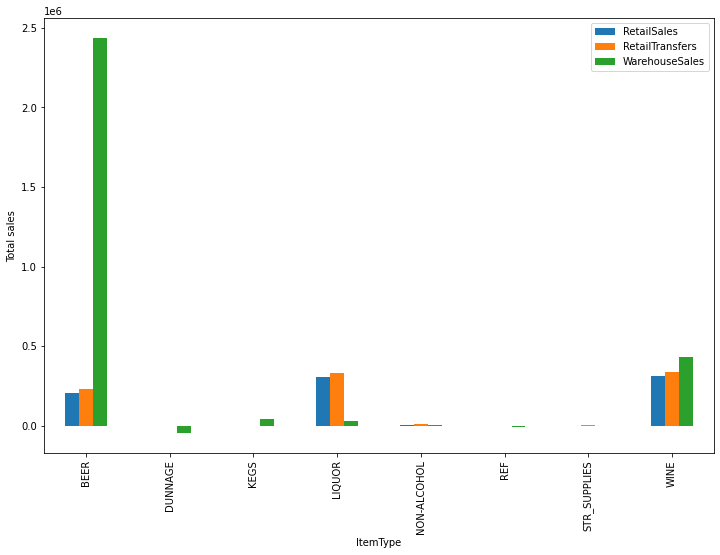

In [57]:
import matplotlib.pyplot as plt
import numpy as np


data1 = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']].groupby(['ItemType']).sum()
data1.plot.bar(figsize = (12,8), ylabel = 'Total sales')
plt.show()


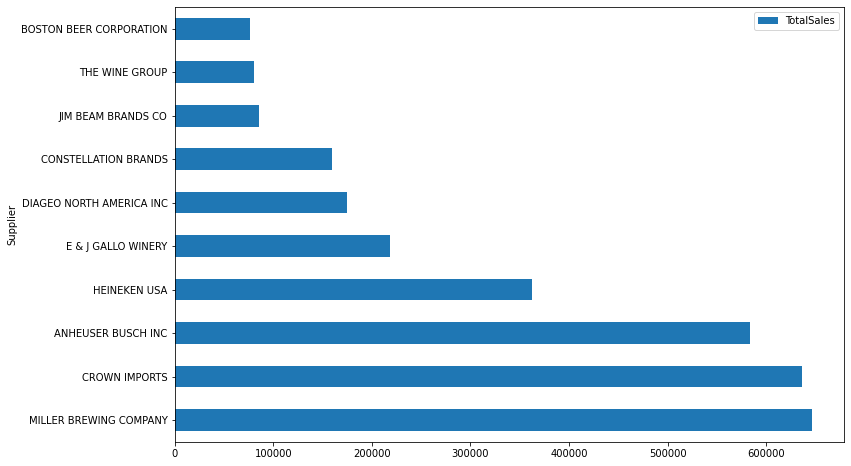

In [58]:
#2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales.
 
data['TotalSales']=data['RetailSales']+data['RetailTransfers']+data['WarehouseSales'] 
suppliers = data.groupby('Supplier')[['TotalSales']].sum()
top10= suppliers.sort_values(by='TotalSales', ascending=False).head(10)

#Plot
top10.plot.barh(figsize = (12,8), ylabel = 'Total sales for Top 10 suppliers')
plt.show()




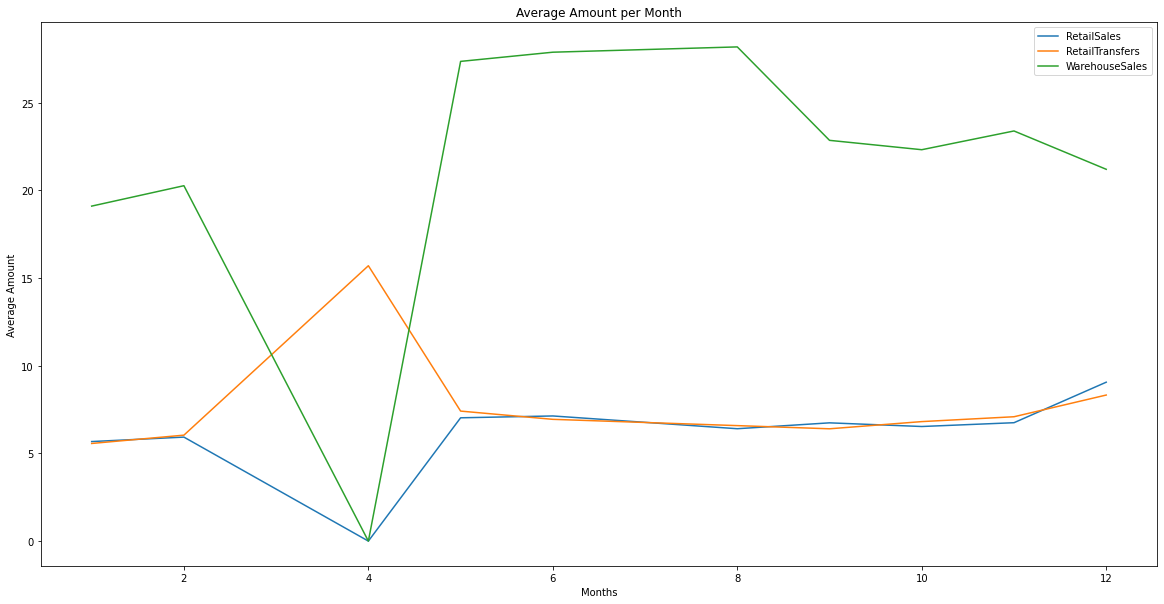

In [59]:
#3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.
 
avg_sales = data.groupby(['Month'])[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()
avg_sales.plot(figsize=(20,10))

plt.title('Average Amount per Month')
plt.xlabel('Months')
plt.ylabel('Average Amount')

plt.show()



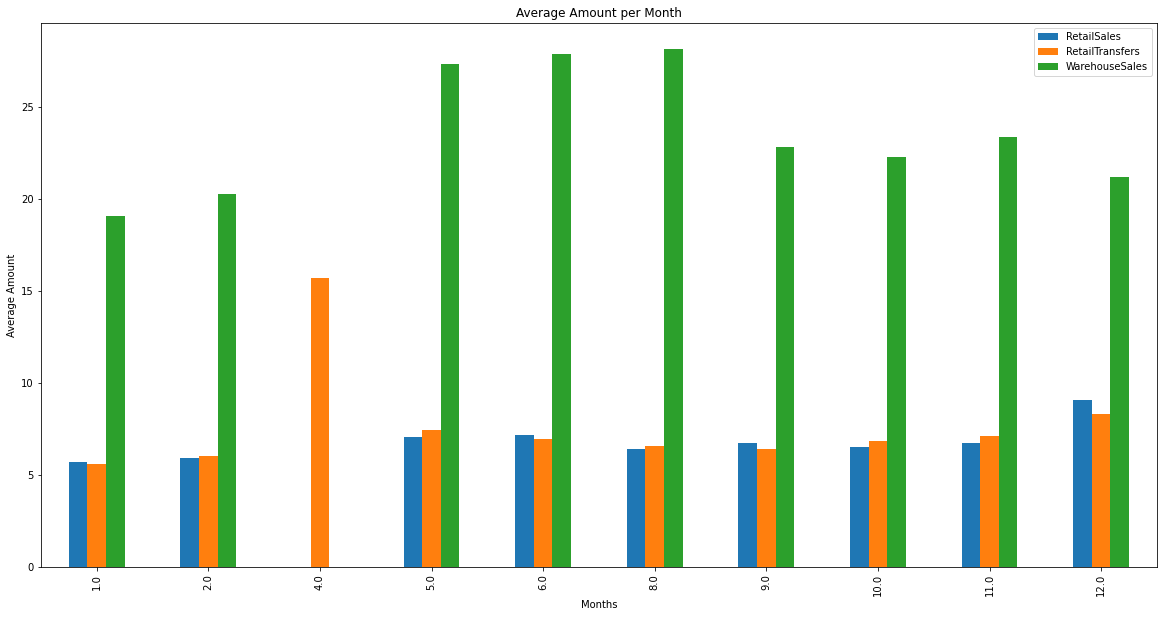

In [60]:
#4. Plot the same information as above but as a bar chart.
avg_sales.plot.bar(figsize=(20,10))

plt.title('Average Amount per Month')
plt.xlabel('Months')
plt.ylabel('Average Amount')

plt.show()

 


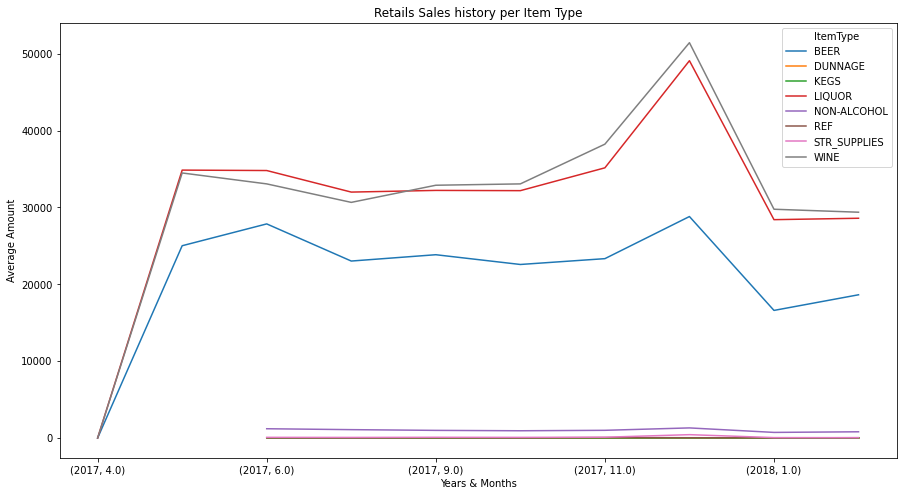

In [62]:
#5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).
#Hint: There should be a line representing each Item Type.


retail_per_item = pd.pivot_table(data, columns = 'ItemType', values = 'RetailSales', index = ['Year', 'Month'], aggfunc = sum)
retail_per_item.plot(figsize = (15,8))

plt.title('Retails Sales history per Item Type')
plt.xlabel('Years & Months')
plt.ylabel('Average Amount')

plt.show()


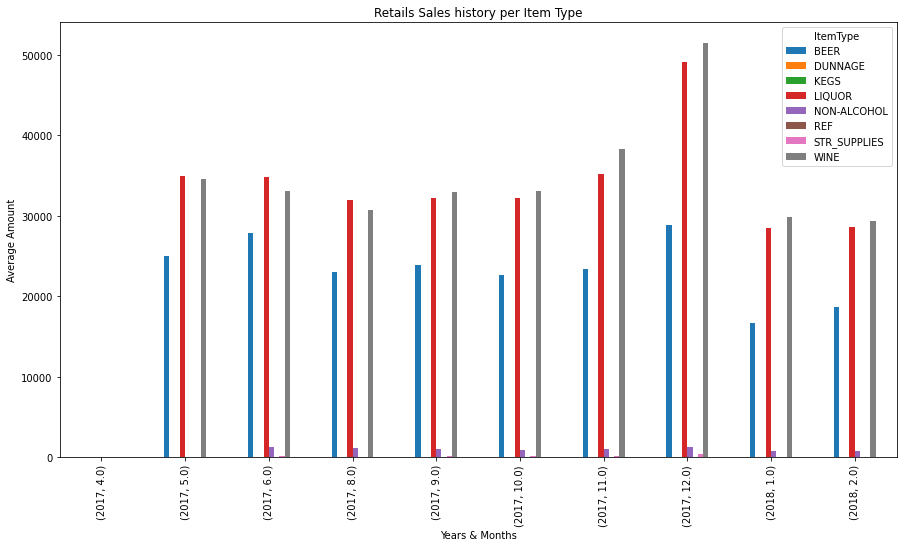

In [63]:

#6. Plot the same information as above but as a bar chart.
 
retail_per_item.plot.bar(figsize = (15,8))

plt.title('Retails Sales history per Item Type')
plt.xlabel('Years & Months')
plt.ylabel('Average Amount')

plt.show()

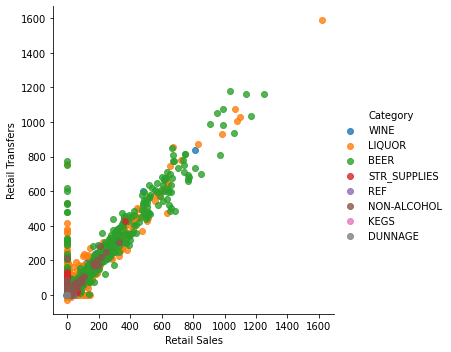

In [72]:
#7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.
#Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = data['RetailSales']
y = data['RetailTransfers']
cat = [i for i in data['ItemType'] ]
df = pd.DataFrame({"Retail Sales": x,
                   "Retail Transfers": y,
                  'Category':cat})

sns.lmplot(x= "Retail Sales", y = "Retail Transfers", data = df, fit_reg = False, hue = 'Category')
 


array([[<AxesSubplot:xlabel='Month', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='Month'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='Month'>,
        <AxesSubplot:xlabel='TotalSales', ylabel='Month'>],
       [<AxesSubplot:xlabel='Month', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='TotalSales', ylabel='RetailSales'>],
       [<AxesSubplot:xlabel='Month', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel='TotalSales', ylabel='RetailTransfers'>],
       [<AxesSubp

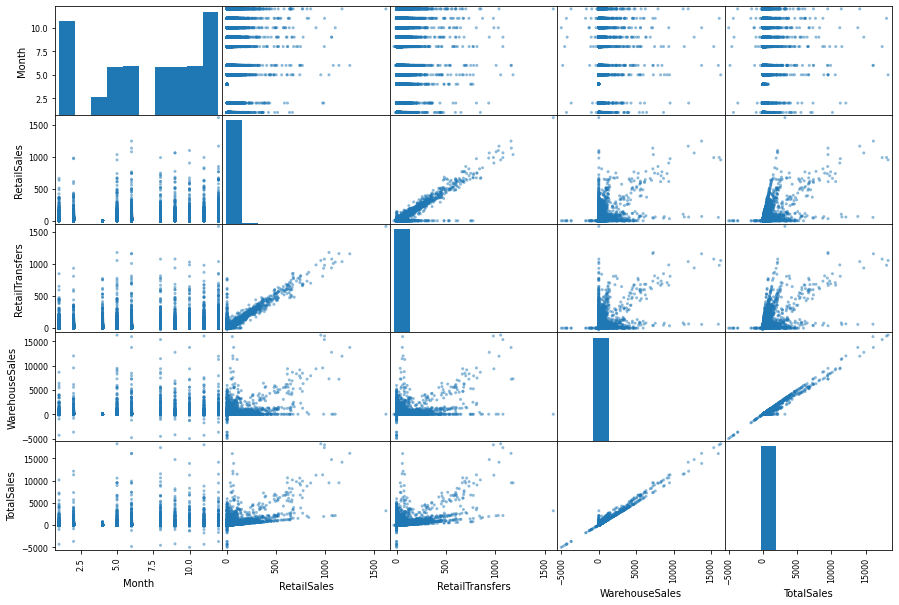

In [73]:
#8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.
#Hint: Seaborn's pairplot may be your best option here.


sctr_matrix = data.select_dtypes(include=['float64', 'int64'])
pd.plotting.scatter_matrix(sctr_matrix, figsize=(15,10))



